## Identifying Duplicate Questions

Our goal is to identify which questions asked on Quora, a quasi-forum website with over 100 million visitors a month,
are duplicates of questions that have already been asked. This could be useful, for example, to instantly provide
answers to questions that have already been answered. We are tasked with predicting whether a pair of questions are
duplicates or not, and submitting a binary prediction against the logloss metric.

In [4]:
import numpy as np
import pandas as pd
import os
import gc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pal = sns.color_palette()

In [5]:
train = pd.read_csv('./quora/train.csv')
train.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [7]:
print('Total Number of Question Pairs: {}'.format(len(train)))
print('Duplicate Pairs: {}%'.format(round(train['is_duplicate'].mean()*100,2)))

Total Number of Question Pairs: 404290
Duplicate Pairs: 36.92%


In [8]:
qids = pd.Series(train['qid1'].tolist()+ train['qid2'].tolist())
print('Totol number of questions in trainin data: {}'.format(len(np.unique(qids))))

print('Number of questions that appear multiple times: {}'.format(np.sum(qids.value_counts() > 1)))

Totol number of questions in trainin data: 537933
Number of questions that appear multiple times: 111780


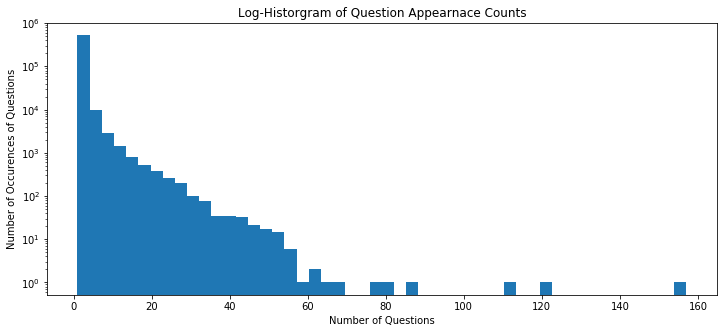

In [10]:
# ploting
plt.figure(figsize=(12,5))
plt.hist(qids.value_counts(), bins=50)
plt.yscale('log', nonposy='clip')
plt.title('Log-Historgram of Question Appearnace Counts')
plt.ylabel('Number of Occurences of Questions')
plt.xlabel('Number of Questions');

Most questions only appear a few times, with very few questions appearing several times (and a few questions appearing many times). One question appears more than 160 times, but this is an outlier.

We can see that we have a 37% positive class in this dataset. Since we are using the LogLoss metric, and LogLoss looks at the actual predicts as opposed to the order of predictions, we should be able to get a decent score by creating a submission predicting the mean value of the label.

### Test Set

In [11]:
test = pd.read_csv('./quora/test.csv')
test.head()

/Users/ujjawalpathak/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?


In [12]:
print('Total Number of Question Pairs for Testing: {}'.format(len(test)))

Total Number of Question Pairs for Testing: 3563475


We can actually see in the head of the test data that some of the questions are obviously auto-generated, as we get delights such as "How their can I start reading?" and "What foods fibre?"

### Text Analysis

In [ ]:
train_qs = pd.Series(train['question1'].tolist() + train['question2'].tolist()).astype(str)
test_qs = pd.Series(test['question1'].tolist() + train['question2'].tolist()).astype(str)

dist_train = train_qs.apply(len)
dist_test = test_qs.apply(len)